## 前程无忧招聘信息数据分析

### 数据来源及问题界定
#### 数据来源
本次数据分析的招聘信息数据来源于前程无忧网站，爬取的关键字为：数据分析、数据挖掘、算法*、机器学习、深度学习、人工智能。爬取的内容有工作名称、薪资、公司信息、待遇等内容。本次项目分析的主要目的是通过对爬取的招聘信息数据进行处理，分析，了解当前形势下的就业前景及对相关知识的完善和补充。

### 数据分析要求
1.清洗过滤数据，去重，填空值，去非技术岗位  
2.不同岗位数量在全国范围内所占的比例。  
3.每个岗位薪酬和工作经验间的对比。  
4.全国不同城市，针对3种最热门岗位的岗位需求量。  
5.不同规模的公司，对于人工智能岗位的薪酬待遇  
6.不同规模公司，对人工智能岗位的经验和学历要求  

## 导入相关库
Python数据分析常用库：pandas，numpy，matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据集和数据清洗

In [2]:
#导入岗位信息记录表
jobs_info_origin = pd.read_csv('51job_part1.csv',encoding='utf-8')
jobs_info_origin1 = pd.read_csv('51job_part2.csv',encoding = 'utf-8')

In [3]:
#对数据集进行合并
jobs_info = pd.concat([jobs_info_origin,jobs_info_origin1],ignore_index=True)
#jobs_info.to_csv('51job_info.csv', encoding = 'utf-8')

In [4]:
#jobs_info为完整的数据
#查看数据
jobs_info.head(5)

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,search_url
0,互联网/电子商务,腾讯成立于1998年11月，是目前中国领先的互联网增值服务提供商之一。成立10多年以来，腾讯...,北京 | 3-4年经验 | 本科 | 招10人,深圳市腾讯计算机系统有限公司,10000人以上,民营公司,本科,3-4年经验,岗位职责：1. 熟悉常用的数据挖掘算法，对机器学习、深度学习、强化学习、模型可解释性方面有相...,29912-（微视北京专场）数据挖掘算法工程师,NaN,NaN,数据挖掘,https://jobs.51job.com/beijing/129565179.html?...
1,"生活服务,餐饮业",爱玛客美国总部1936年创立于美国费城，纽约证券交易所上市，系全球餐饮、设施、制服外包服务领...,南京 | 1年经验 | 大专 | 招1人,爱玛客服务产业（中国）有限公司,10000人以上,外资（欧美）,大专,1年经验,岗位职责：1.华为tririga系统维护，数据上线及合同交底；2.负责tririga系统、G...,数据分析员,"专业培训,五险一金,带薪年假",5-5.5千/月,数据分析,https://jobs.51job.com/nanjing/129573239.html?...
2,"计算机软件,计算机服务(系统、数据服务、维修)",亿达信息技术有限公司（简称YIDATEC）创建于2006年，是中国领先、国际化的IT服务及数...,深圳-南山区 | 3-4年经验 | 本科 | 招1人,大连亿达信息技术有限公司深圳分公司,500-1000人,民营公司,本科,3-4年经验,"本科，需要具备数据分析和数据挖掘的能力和经验1.熟悉数据库查询脚本,如mysql或者hive...",数据挖掘工程师,"五险一金,补充商业保险,公积金,年终奖金,员工旅游,定期体检",1-2万/月,数据挖掘,https://jobs.51job.com/shenzhen-nsq/128453493....
3,计算机软件,南方电网深圳数字电网研究院有限公司（以下简称“深圳数研院”）成立于2020年5月，现有人员规...,广州-黄埔区 | 3-4年经验 | 本科 | 招2人,南方电网深圳数字电网研究院有限公司,1000-5000人,国企,本科,3-4年经验,1. 能针对不同业务场景选择合适的算法进行特征提取、模型建立、效果评估及模型优化；2. 熟悉...,数据分析师（数据挖掘）,"五险一金,补充医疗保险,员工旅游,餐饮补贴,通讯补贴,定期体检,年终奖金,绩效奖金,专业培训...",1.2-2万/月,数据挖掘,https://jobs.51job.com/guangzhou-hpq/125434538...
4,"制药/生物工程,学术/科研",华大成立于1999年，是全球领先的生命科学前沿机构。秉承“基因科技造福人类”的使命，怀抱“健...,异地招聘 | 2年经验 | 硕士 | 招1人,深圳华大基因科技有限公司,5000-10000人,民营公司,硕士,2年经验,工作职责:1.负责时空组学数据挖掘，包括表达矩阵、基因调控相关等，揭示时空组学背后的生命科学...,数据挖掘高级工程师（时空组学）(J16524),"餐饮补贴,专业培训,定期体检,六险一金,年终奖金,班车,员工旅游,前沿项目",1.7-3万/月,数据挖掘,https://jobs.51job.com/shenzhen-ytq/127783757....


In [5]:
#查看数据维度
jobs_info.shape

(138176, 14)

In [6]:
#查看所有的列标签
jobs_info.columns

Index(['company_industry', 'company_info', 'company_locations',
       'company_names', 'company_size', 'company_type', 'job_EDU_require',
       'job_EXP_require', 'job_position_info', 'job_position_names',
       'job_position_welfare', 'job_salary', 'search_by', 'search_url'],
      dtype='object')

## 数据清洗
### 检查重复数据，去重

In [7]:
#检查重复的岗位URL
jobs_info['search_url'].duplicated().sum()

10203

In [8]:
#检查重复的工作信息
jobs_info['job_position_info'].duplicated().sum()

21807

In [9]:
#检查重复行
jobs_info.duplicated().sum()

30

In [10]:
#根据搜索关键字和工作信息查重
jobs_info.duplicated(['search_by','job_position_info']).sum()

12627

### 删除重复数据

In [11]:
#删除重复的工作岗位信息
jobs_info.drop_duplicates(['job_position_info'] , inplace = True )

In [12]:
#根据搜索关键字和工作信息去重
jobs_info.drop_duplicates(['search_by','job_position_info'],inplace = True)

In [13]:
#检查去重结果
jobs_info['job_position_info'].duplicated().sum()

0

In [14]:
jobs_info.duplicated(['search_by','job_position_info']).sum()

0

In [15]:
#查看去重之后的数据维度
jobs_info.shape

(116369, 14)

### 查看处理缺失值


In [16]:
jobs_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116369 entries, 0 to 138173
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   company_industry      116369 non-null  object
 1   company_info          116330 non-null  object
 2   company_locations     116369 non-null  object
 3   company_names         116369 non-null  object
 4   company_size          113172 non-null  object
 5   company_type          116352 non-null  object
 6   job_EDU_require       116369 non-null  object
 7   job_EXP_require       116369 non-null  object
 8   job_position_info     116369 non-null  object
 9   job_position_names    116369 non-null  object
 10  job_position_welfare  94363 non-null   object
 11  job_salary            111436 non-null  object
 12  search_by             116369 non-null  object
 13  search_url            116369 non-null  object
dtypes: object(14)
memory usage: 13.3+ MB


### 删除对于数据分析无意义的字段，根据本次数据分析的要求我们将岗位的URL字段删除

In [17]:
jobs_info.drop('search_url',axis = 1,inplace= True)

In [18]:
jobs_info.columns

Index(['company_industry', 'company_info', 'company_locations',
       'company_names', 'company_size', 'company_type', 'job_EDU_require',
       'job_EXP_require', 'job_position_info', 'job_position_names',
       'job_position_welfare', 'job_salary', 'search_by'],
      dtype='object')

In [19]:
jobs_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116369 entries, 0 to 138173
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   company_industry      116369 non-null  object
 1   company_info          116330 non-null  object
 2   company_locations     116369 non-null  object
 3   company_names         116369 non-null  object
 4   company_size          113172 non-null  object
 5   company_type          116352 non-null  object
 6   job_EDU_require       116369 non-null  object
 7   job_EXP_require       116369 non-null  object
 8   job_position_info     116369 non-null  object
 9   job_position_names    116369 non-null  object
 10  job_position_welfare  94363 non-null   object
 11  job_salary            111436 non-null  object
 12  search_by             116369 non-null  object
dtypes: object(13)
memory usage: 12.4+ MB


In [20]:
#删除数据中的缺失值
jobs_info.dropna(inplace = True)
jobs_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92899 entries, 1 to 138173
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company_industry      92899 non-null  object
 1   company_info          92899 non-null  object
 2   company_locations     92899 non-null  object
 3   company_names         92899 non-null  object
 4   company_size          92899 non-null  object
 5   company_type          92899 non-null  object
 6   job_EDU_require       92899 non-null  object
 7   job_EXP_require       92899 non-null  object
 8   job_position_info     92899 non-null  object
 9   job_position_names    92899 non-null  object
 10  job_position_welfare  92899 non-null  object
 11  job_salary            92899 non-null  object
 12  search_by             92899 non-null  object
dtypes: object(13)
memory usage: 9.9+ MB


In [21]:
jobs_info.shape

(92899, 13)

### 学历数据清洗

In [22]:
#查看招聘数据中所有学历要求的内容
jobs_info['job_EDU_require'].unique()

array(['大专', '本科', '硕士', '招1人', '博士', '招3人', '招2人', '03-04发布', '招若干人',
       '招5人', '高中', '中专', '招50人', '中技', '招4人', '03-03发布', '招9人',
       '03-02发布', '招10人', '02-24发布', '02-07发布', '招20人', '招6人', '招7人',
       '招30人', '招8人', '初中及以下', '招12人', '招25人', '招29人', '招100人', '03-01发布',
       '02-27发布', '02-26发布', '02-23发布', '02-11发布', '02-08发布', '02-05发布',
       '01-27发布', '01-25发布', '招300人', '招60人', '01-09发布', '02-04发布',
       '招18人', '招15人', '02-28发布', '02-22发布', '01-29发布', '01-24发布',
       '02-25发布', '招33人', '招99人', '02-20发布', '02-06发布', '01-30发布', '招16人',
       '01-07发布', '02-19发布', '招200人', '招35人', '01-13发布', '03-05发布',
       '01-12发布', '02-18发布', '02-16发布', '招11人', '01-21发布', '02-12发布',
       '招19人'], dtype=object)

In [23]:
# 删除无关数据
jobs_info = jobs_info[~jobs_info["job_EDU_require"].str.contains("招|初中及以下|高中|中技|发布")]

In [24]:
# 删除后数据检查
jobs_info["job_EDU_require"].value_counts()

本科    42444
大专    38729
硕士     4945
中专     1734
博士      498
Name: job_EDU_require, dtype: int64

In [25]:
jobs_info.shape

(88350, 13)

### 保留技术岗位

In [26]:
jobs_info["job_position_names"].value_counts()

算法工程师                      752
数据分析师                      686
产品经理                       642
Java开发工程师                  523
嵌入式软件工程师                   462
                          ... 
TMT行业分析师                     1
高级C/C++开发工程师 (MJ001686)      1
深度学习算法工程师（nlp方向）             1
海外推广/Facebook推广/亚马逊站外推广      1
系统总工程师                       1
Name: job_position_names, Length: 47926, dtype: int64

In [27]:
# 数据筛选(不区分大小写)
jobs_info=jobs_info[jobs_info["job_position_names"].str.contains("股票|计算|研究|交易|Data|语音|工程师|研发|人脸|图像|挖掘|机器学习|识别|Py|建模|开发|人工智能|AI|数据|深度|算法|机器|自然语言|学习建模|NLP|视觉|声音|文字|SQL|Java|DATA",case = False)]

In [28]:
jobs_info.shape

(33329, 13)

In [29]:
jobs_info["job_position_names"].value_counts()

算法工程师                       752
数据分析师                       686
Java开发工程师                   523
嵌入式软件工程师                    462
大数据开发工程师                    406
                           ... 
智能车网联测试工程师                    1
AI Lab机器学习系统研究员               1
QT开发工程师/C++开发工程师（急聘）          1
大数据开发工程师（LT21pz）(J12530)      1
DQA工程师                        1
Name: job_position_names, Length: 17538, dtype: int64

### 薪资空值填充

In [30]:
# 查看薪资空值个数
sum(jobs_info['job_salary'].isnull()==True)

0

In [31]:
# 薪资按值排序
jobs_info['job_salary'].sort_values()

53548     0.2-1.2万/月
109143    0.3-1.2万/月
23393     0.3-1.3万/月
110781    0.3-1.5万/月
83270     0.3-1.5万/月
             ...    
57769        9-15万/年
54962        9-16万/月
64119        9-18万/年
94975        9-20万/年
3374       90-120万/年
Name: job_salary, Length: 33329, dtype: object

### 薪资单位转换

In [32]:
# 将万元/月转换为元/月
jobs_info['salary1'] = jobs_info.loc[jobs_info['job_salary'].str.contains('万/月')]['job_salary'].apply(lambda x:np.mean(list(map(float,x.replace('万/月','').split('-'))))*10000)
jobs_info['salary1'].fillna(0,inplace = True)

In [33]:
jobs_info['salary2'] = jobs_info.loc[jobs_info['job_salary'].str.contains('万/年')]['job_salary'].apply(lambda x:np.mean(list(map(float,x.replace('万/年','').split('-'))))*10000/12)
jobs_info['salary2'].fillna(0,inplace = True)

In [34]:
jobs_info['salary3'] = jobs_info.loc[jobs_info['job_salary'].str.contains('千/月')]['job_salary'].apply(lambda x:np.mean(list(map(float,x.replace('千/月','').split('-'))))*1000)
jobs_info['salary3'].fillna(0,inplace = True)

In [35]:
jobs_info['salary4'] = jobs_info.loc[jobs_info['job_salary'].str.contains('元/天')]['job_salary'].apply(lambda x:np.mean(list(map(float,x.replace('元/天','').split('-'))))*30)
jobs_info['salary4'].fillna(0,inplace = True)

In [36]:
# 转换后合并为salary列
jobs_info['salary']=jobs_info['salary1']+jobs_info['salary2']+jobs_info['salary3']+jobs_info['salary4']
jobs_info.head(1)

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,salary1,salary2,salary3,salary4,salary
1,"生活服务,餐饮业",爱玛客美国总部1936年创立于美国费城，纽约证券交易所上市，系全球餐饮、设施、制服外包服务领...,南京 | 1年经验 | 大专 | 招1人,爱玛客服务产业（中国）有限公司,10000人以上,外资（欧美）,大专,1年经验,岗位职责：1.华为tririga系统维护，数据上线及合同交底；2.负责tririga系统、G...,数据分析员,"专业培训,五险一金,带薪年假",5-5.5千/月,数据分析,0.0,0.0,5250.0,0.0,5250.0


### 删除处理薪资单位的中间值字段

In [37]:
jobs_info.drop(['salary1','salary2','salary3','salary4'],axis=1,inplace=True)

In [38]:
# 查看删除后的字段名
jobs_info.columns

Index(['company_industry', 'company_info', 'company_locations',
       'company_names', 'company_size', 'company_type', 'job_EDU_require',
       'job_EXP_require', 'job_position_info', 'job_position_names',
       'job_position_welfare', 'job_salary', 'search_by', 'salary'],
      dtype='object')

In [39]:
jobs_info.head(1)

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,salary
1,"生活服务,餐饮业",爱玛客美国总部1936年创立于美国费城，纽约证券交易所上市，系全球餐饮、设施、制服外包服务领...,南京 | 1年经验 | 大专 | 招1人,爱玛客服务产业（中国）有限公司,10000人以上,外资（欧美）,大专,1年经验,岗位职责：1.华为tririga系统维护，数据上线及合同交底；2.负责tririga系统、G...,数据分析员,"专业培训,五险一金,带薪年假",5-5.5千/月,数据分析,5250.0


In [40]:
# 薪资列排序
jobs_info['salary'].sort_values()

54295          0.0
107233         0.0
106943         0.0
20333          0.0
1308           0.0
            ...   
52534     400000.0
54027     400000.0
58359     400000.0
54971     425000.0
52746     475000.0
Name: salary, Length: 33329, dtype: float64

In [41]:
# # 统计薪资列值为0的数量（由于上面只处理了4种单位，剩下的单位为NaN，列合并后值为0，删除工资为0的行
jobs_info.drop(index=jobs_info[jobs_info['salary']==0].index,inplace=True)

In [42]:
# 验证薪资为0的数量
jobs_info[jobs_info['salary'].values==0]

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,salary


In [43]:
jobs_info.head(1)

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,salary
1,"生活服务,餐饮业",爱玛客美国总部1936年创立于美国费城，纽约证券交易所上市，系全球餐饮、设施、制服外包服务领...,南京 | 1年经验 | 大专 | 招1人,爱玛客服务产业（中国）有限公司,10000人以上,外资（欧美）,大专,1年经验,岗位职责：1.华为tririga系统维护，数据上线及合同交底；2.负责tririga系统、G...,数据分析员,"专业培训,五险一金,带薪年假",5-5.5千/月,数据分析,5250.0


In [44]:
jobs_info = jobs_info[jobs_info["salary"]<100000]
jobs_info = jobs_info[jobs_info["salary"]>7000]
jobs_info.head(5)

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,salary
2,"计算机软件,计算机服务(系统、数据服务、维修)",亿达信息技术有限公司（简称YIDATEC）创建于2006年，是中国领先、国际化的IT服务及数...,深圳-南山区 | 3-4年经验 | 本科 | 招1人,大连亿达信息技术有限公司深圳分公司,500-1000人,民营公司,本科,3-4年经验,"本科，需要具备数据分析和数据挖掘的能力和经验1.熟悉数据库查询脚本,如mysql或者hive...",数据挖掘工程师,"五险一金,补充商业保险,公积金,年终奖金,员工旅游,定期体检",1-2万/月,数据挖掘,15000.0
3,计算机软件,南方电网深圳数字电网研究院有限公司（以下简称“深圳数研院”）成立于2020年5月，现有人员规...,广州-黄埔区 | 3-4年经验 | 本科 | 招2人,南方电网深圳数字电网研究院有限公司,1000-5000人,国企,本科,3-4年经验,1. 能针对不同业务场景选择合适的算法进行特征提取、模型建立、效果评估及模型优化；2. 熟悉...,数据分析师（数据挖掘）,"五险一金,补充医疗保险,员工旅游,餐饮补贴,通讯补贴,定期体检,年终奖金,绩效奖金,专业培训...",1.2-2万/月,数据挖掘,16000.0
4,"制药/生物工程,学术/科研",华大成立于1999年，是全球领先的生命科学前沿机构。秉承“基因科技造福人类”的使命，怀抱“健...,异地招聘 | 2年经验 | 硕士 | 招1人,深圳华大基因科技有限公司,5000-10000人,民营公司,硕士,2年经验,工作职责:1.负责时空组学数据挖掘，包括表达矩阵、基因调控相关等，揭示时空组学背后的生命科学...,数据挖掘高级工程师（时空组学）(J16524),"餐饮补贴,专业培训,定期体检,六险一金,年终奖金,班车,员工旅游,前沿项目",1.7-3万/月,数据挖掘,23500.0
5,学术/科研,TCL集团工业研究院成立于2005年7月1日，直属于TCL集团总部，是集团中央研究机构，属于...,西安-高新技术产业开发区 | 2年经验 | 硕士 | 招1人,TCL集团工业研究院,150-500人,民营公司,硕士,2年经验,任职/技能要求： 1.计算机及数学相关专业毕业，硕士及以上学历； 2.具有良好的逻辑思维...,数据挖掘、算法工程师,"餐饮补贴,专业培训,五险一金,补充医疗保险,员工旅游,定期体检,年终奖金,绩效奖金",1.5-2万/月,数据挖掘,17500.0
9,网络游戏,完美世界(北京)网络技术有限公司（以下简称：完美世界）是中国领先的网络游戏开发商和运营商之一...,上海 | 3-4年经验 | 本科 | 招1人,完美世界（上海）/完美时空,150-500人,民营公司,本科,3-4年经验,1． 大学本科及以上学历，三年以上数据挖掘工作； 2． 熟练使用各类数据结构和算法，熟悉li...,数据挖掘工程师,"五险一金,补充公积金,免费班车,餐饮补贴,绩效奖金,年终奖金",2.5-3万/月,数据挖掘,27500.0


### 岗位数量和薪酬关系
分析不同岗位数量在全国范围内所占的比例

In [45]:
jobs_info["search_by"].value_counts()

算法招聘    17925
数据分析     5723
人工智能     2149
机器学习     1487
数据挖掘     1402
深度学习      413
Name: search_by, dtype: int64

In [46]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
%config InlineBackend.figure_format = 'svg'

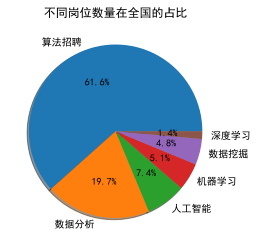

In [47]:
# 显示前十行工作数据在全国的占比
plt.pie(jobs_info["search_by"].value_counts(),labels=jobs_info["search_by"].value_counts().index,shadow=True,autopct='%1.1f%%')

plt.title("不同岗位数量在全国的占比")

plt.show()

从饼图中可以看出算法、数据分析、人工智能占了绝大部分岗位,算法岗位占了绝大部分的岗位（65.3%）。

### 全国排名前十技术岗位

In [48]:
# # 取job_name_detail 值数量，并取前十行数据
jobs_info_counts = jobs_info['job_position_names'].value_counts().iloc[1:10]

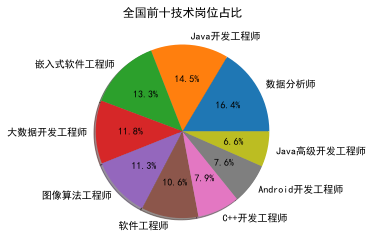

In [49]:
# # 制作饼状图，显示前十行工作数据在全国的占比
plt.pie(jobs_info_counts.values,labels=jobs_info_counts.index,shadow=True,autopct='%1.1f%%')

plt.title("全国前十技术岗位占比")

plt.show()

#### 从上图中可以看出数据分析师、Java开发工程师、嵌入式工程师、图像算法工程师占比比较高

## 每个岗位薪酬和工作经验之间的对比
### 不同岗位平均薪资对比

In [50]:
df_ks = jobs_info.groupby(['search_by'])['salary'].mean().sort_values(ascending = False)

In [51]:
df_ks

search_by
机器学习    20242.210267
深度学习    19532.284100
算法招聘    18888.442585
人工智能    16734.721576
数据挖掘    15927.306229
数据分析    13639.840701
Name: salary, dtype: float64

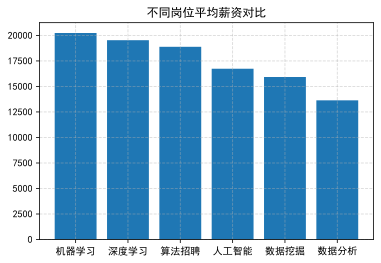

In [52]:
#绘制柱状图
plt.bar(x=df_ks.index,height=df_ks.values)

plt.title("不同岗位平均薪资对比")

plt.grid(linestyle="--",alpha=0.5)

plt.show()

#### 深度学习，机器学习，算法岗位的薪资较高，而数据挖掘，数据分析的岗位薪酬较低

### 岗位工作经验处理

In [53]:
# 查看工作经验为空的数
jobs_info['job_EXP_require'].isnull().sum()

0

In [54]:
# 查看工作经验排行
jobs_info['job_EXP_require'].value_counts()

3-4年经验     11133
2年经验        6112
5-7年经验      4307
1年经验        3995
无需经验        1552
在校生/应届生     1475
8-9年经验       344
10年以上经验      181
Name: job_EXP_require, dtype: int64

In [55]:
# 根据工作经验列出平均薪资
jobs_info['salary'].groupby(jobs_info['job_EXP_require']).mean()

job_EXP_require
10年以上经验    32540.976059
1年经验       13749.094702
2年经验       15332.126691
3-4年经验     18248.665379
5-7年经验     22232.940562
8-9年经验     29662.911822
在校生/应届生    14793.158192
无需经验       17799.624141
Name: salary, dtype: float64

In [56]:
df_x=jobs_info['salary'].groupby(jobs_info['job_EXP_require']).mean().sort_values()
df_x

job_EXP_require
1年经验       13749.094702
在校生/应届生    14793.158192
2年经验       15332.126691
无需经验       17799.624141
3-4年经验     18248.665379
5-7年经验     22232.940562
8-9年经验     29662.911822
10年以上经验    32540.976059
Name: salary, dtype: float64

In [57]:
df_x.index

Index(['1年经验', '在校生/应届生', '2年经验', '无需经验', '3-4年经验', '5-7年经验', '8-9年经验',
       '10年以上经验'],
      dtype='object', name='job_EXP_require')

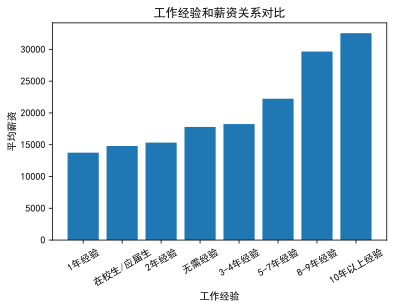

In [58]:
df_x = jobs_info['salary'].groupby(jobs_info['job_EXP_require']).mean()

# 1. 绘制画布
plt.figure(figsize=(6,4),dpi=100)

# 2. 图像绘制
plt.bar(x=df_x.sort_values().index,height=df_x.sort_values())

# 2.1 添加网格
# plt.grid(True,linestyle="--",alpha=0.5)

# 2.2 添加xy轴标题
plt.xlabel("工作经验")
plt.ylabel("平均薪资")
plt.title("工作经验和薪资关系对比")
plt.xticks(rotation = 30)
# 3. 展示图像
plt.show()

随着工作经验要求的提高，薪资水平逐步提升，且经验达到5年之后，薪资水平预期会有比较高的提升

## 全国不同城市，三种最热门岗位的需求量
### 公司地点数据处理

In [59]:
jobs_info['company_locations_new']=jobs_info['company_locations'].apply(lambda x:x.split('-')[0])
jobs_info.head(1)

,company_industry,company_info,company_locations,company_names,company_size,company_type,job_EDU_require,job_EXP_require,job_position_info,job_position_names,job_position_welfare,job_salary,search_by,salary,company_locations_new
2,"计算机软件,计算机服务(系统、数据服务、维修)",亿达信息技术有限公司（简称YIDATEC）创建于2006年，是中国领先、国际化的IT服务及数...,深圳-南山区 | 3-4年经验 | 本科 | 招1人,大连亿达信息技术有限公司深圳分公司,500-1000人,民营公司,本科,3-4年经验,"本科，需要具备数据分析和数据挖掘的能力和经验1.熟悉数据库查询脚本,如mysql或者hive...",数据挖掘工程师,"五险一金,补充商业保险,公积金,年终奖金,员工旅游,定期体检",1-2万/月,数据挖掘,15000.0,深圳


In [60]:
# 查看公司地点
jobs_info["company_locations_new"].unique()

array(['深圳', '广州', '异地招聘  |  2年经验  |  硕士  |  招1人', ...,
       '青岛  |  无需经验  |  大专  |  招5人', '广州  |  在校生/应届生  |  本科  |  招4人',
       '异地招聘  |  在校生/应届生  |  本科  |  招6人'], dtype=object)

In [61]:
# 将异地招聘删除
jobs_info = jobs_info[~jobs_info["company_locations_new"].str.contains("异地招聘|省")]

In [62]:
jobs_info.shape

(27446, 15)

In [63]:
jobs_info['company_locations_new'].value_counts().head(10)

上海    4170
深圳    4164
广州    2334
北京    1751
杭州    1149
成都     941
武汉     928
南京     879
苏州     830
西安     410
Name: company_locations_new, dtype: int64

In [65]:
#不同岗位数量在全国范围内的分布
count=jobs_info['company_locations_new'].value_counts()

from pyecharts import options as opts
from pyecharts.charts import Geo
#from pyecharts.faker import Faker

c = (
    Geo(
        is_ignore_nonexistent_coord= True,#忽略不存在的地点
    )
    .add_schema(maptype="china",     # 地图类型
                aspect_scale= 0.75,  #地图的长宽比。
               )
    
    .add("geo", 
         [list(count) for count in zip(count.index.tolist(), count.tolist())],#传入的值
         
         point_size=1000,
         symbol_size=8,  #标记点的大小
         color='green',   #标记点颜色
        )
    
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(min_=0,max_=1000),#设置滑动标签的大小值
        title_opts=opts.TitleOpts(title="岗位数量全国分布图")
    )
)
c.render_notebook()

ModuleNotFoundError: No module named 'pyecharts'

#### 从图中可以看出，按城市，北上广深四大城市岗位数量较多，按地区，长三角、珠三角及北京地区岗位需求量较大。不难看出，经济相对发达的地区和城市其岗位需求量也大。

## 不同规模的公司，对于人工智能岗位的薪酬待遇

In [ ]:
jobs_info.head(1)

In [ ]:
jobs_info.shape

In [ ]:
jobs_info.columns

In [ ]:
jobs_info["company_size"].unique()

In [ ]:
df_smart = jobs_info[jobs_info["search_by"]=="人工智能"]
df_smart.shape

In [ ]:
df_smart['salary'].sort_values()

In [ ]:
df_smart.shape

In [ ]:
df_smart[df_smart["company_size"]=="少于50人"]['salary']

### 不同规模的公司人工智能岗位的薪酬待遇箱型图

In [ ]:
#不同规模的公司，对于人工智能岗位的薪酬待遇，制作箱型图
data = [df_smart[df_smart['company_size']=='少于50人']['salary'],
        df_smart[df_smart['company_size']=='50-150人']['salary'],
        df_smart[df_smart['company_size']=='150-500人']['salary'],
        df_smart[df_smart['company_size']=='500-1000人']['salary'],
        df_smart[df_smart['company_size']=='1000-5000人']['salary'],
        df_smart[df_smart['company_size']=='5000-10000人']['salary'],
        df_smart[df_smart['company_size']=='10000人以上']['salary']
       ]

# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

# 创建箱型图
fig, ax = plt.subplots(figsize=(10,5))
# 设置标题
ax.set_title('薪资与公司规模的关系')
ax.boxplot(data)

# 设置标签
plt.xlabel("公司规模")
plt.ylabel("薪资")
plt.grid()
ax.set_xticklabels(['少于50人','50-150人','150-500人','500-1000人','1000-5000人','5000-10000人','10000人以上']) #设置x轴刻度标签
# 倾斜x轴
plt.xticks(rotation=-30)

plt.show()

可以看出公司规模居中的公司，其薪资水平较高

### 人工智能不同公司规模和岗位数量对比

In [ ]:
df_opp = df_smart["company_size"].value_counts()
df_opp = df_opp[['少于50人','50-150人','150-500人','500-1000人','1000-5000人','5000-10000人','10000人以上']]
df_opp

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(df_opp.index,height=df_opp.values,width=0.6)
plt.title("人工智能不同公司规模和岗位数量对比")
plt.xlabel("公司规模")
plt.ylabel("岗位数量")

plt.show()

0-5000人规模的企业需求的人工智能岗位明显多于5000人以上规模的大型企业

### 不同规模公司，经验和学历要求

In [ ]:
df_smart.head(1)

In [ ]:
df_smart["job_EDU_require"].unique()

In [ ]:
df_edu = df_smart["company_size"].groupby(df_smart["job_EDU_require"]).value_counts()
df_edu

In [ ]:
df_edu = df_edu.unstack()
df_edu

In [ ]:
df_edu=df_edu[['少于50人','50-150人','150-500人','500-1000人','1000-5000人','5000-10000人','10000人以上']]
df_edu

In [ ]:
# 填充空值
df_edu = df_edu.fillna(0)
df_edu

In [ ]:
#重新排序index
df_edu = df_edu.reindex(index=["中专","大专","本科","硕士","博士"])
df_edu

### 不同规模的公司相关学历的招聘量

In [ ]:
#绘制柱状图
df_edu.plot(kind = 'bar',stacked = True,grid = True)
plt.show()

可以看出，本科学历要求远高于其他学历，说明现阶段本科学历需求量依旧很大，但随着社会的发展，学历要求也会逐步提高。

### 不同规模公司对人工智能岗位的学历要求占比

In [ ]:
df1 = pd.DataFrame({df_edu.index[0]:df_edu.iloc[0].values,
                   df_edu.index[1]:df_edu.iloc[1].values,
                   df_edu.index[2]:df_edu.iloc[2].values,
                   df_edu.index[3]:df_edu.iloc[3].values,
                   df_edu.index[4]:df_edu.iloc[4].values,
                  

                   })

df1 = df1[["中专","大专","本科","硕士","博士"]]
df1

In [ ]:
# 按行求和
sum_df1 = df1.sum(axis=1)
sum_df1

In [ ]:
# 算出百分占比
per = df1.div(sum_df1, axis=0)
per

In [ ]:
ax=per.plot(kind = 'bar',stacked = True,grid = False,legend="reverse")

ax.set_xticklabels(df_edu.columns)
ax.set_ylim(0,1)
ax.set_title("不同规模公司对人工智能岗位的学历要求占比")
ax.set_xlabel("公司规模")
ax.set_ylabel("学历要求占比")

plt.show()

相对小规模公司，大规模公司对学历的要求更高，这也是社会发展的趋势，需要我们不断学习。

#### 不同规模公司对人工智能岗位的经验要求占比

In [ ]:
df_smart["job_EXP_require"].unique()

In [ ]:
df_exp = df_smart["company_size"].groupby(df_smart["job_EXP_require"]).value_counts().unstack()
df_exp = df_exp.fillna(0)
df_exp

In [ ]:
df_exp=df_exp[['少于50人','50-150人','150-500人','500-1000人','1000-5000人','5000-10000人','10000人以上']]
df_exp

In [ ]:
df3 = pd.DataFrame({df_exp.index[0]:df_exp.iloc[0].values,
                   df_exp.index[1]:df_exp.iloc[1].values,
                   df_exp.index[2]:df_exp.iloc[2].values,
                   df_exp.index[3]:df_exp.iloc[3].values,
                   df_exp.index[4]:df_exp.iloc[4].values,
                   df_exp.index[5]:df_exp.iloc[5].values,
                   df_exp.index[6]:df_exp.iloc[6].values,

                   })

df3

In [ ]:
#按行求和
sum_exp = df3.sum(axis=1)
sum_exp

In [ ]:
#求出占比
per_exp = df3.div(sum_exp,axis=0)
per_exp

In [ ]:
per_exp.columns

In [ ]:
per_exp = per_exp[["1年经验","2年经验","3-4年经验","5-7年经验","8-9年经验","10年以上经验","在校生/应届生"]]
per_exp

In [ ]:
per_exp.loc[0].sum()

In [ ]:
ax=per_exp.plot(kind = 'bar',stacked = True,grid = False,legend="reverse")

ax.set_xticklabels(df_exp.columns)
ax.set_ylim(0,1)
ax.set_title("不同规模公司对人工智能岗位的经验要求占比")
ax.set_xlabel("公司规模")
ax.set_ylabel("经验要求占比")


经验要求和公司规模整体呈正相关，随着经验的增长，进入大公司的机会也越多。

### 人工智能公司行业占比

In [ ]:
jobs_info.head(1)

In [ ]:
df_undergraduate=jobs_info.query("job_EDU_require=='本科'")
df_undergraduate.head(1)

In [ ]:
df_undergraduate["company_industry"].unique()

In [ ]:
df_undergraduate["company_industry"]

In [ ]:
#d对公司类型进行修改
df_undergraduate.reset_index(inplace=True,drop=True)
for ind,industry in enumerate(df_undergraduate["company_industry"]):
    if "计算机"in industry or "电子"in industry or "通信"in industry or"网络"in industry:
        df_undergraduate["company_industry"][ind]="互联网/通信"
    elif "银行"in industry or "保险"in industry or "金融"in industry or"银行"in industry or"信托"in industry:
        df_undergraduate["company_industry"][ind]="金融"
    elif "贸易"in industry or "批发"in industry or "奢侈品"in industry or"消费品"in industry or"家电"in industry or "汽车"in industry or"办公用品"in industry or"机械"in industry or"贸易"in industry:
        df_undergraduate["company_industry"][ind]="贸易/制造"
    elif "贸易"in industry or "制药"in industry or "医疗"in industry:
        df_undergraduate["company_industry"][ind]="制药/医疗"
    elif "贸易"in industry or "物业"in industry or "建筑"in industry or"房地产"in industry:
        df_undergraduate["company_industry"][ind]="房地产/建筑"
    elif "贸易"in industry or "教育"in industry or "专业服务"in industry:
        df_undergraduate["company_industry"][ind]="教育/培训"
    else:
        df_undergraduate["company_industry"][ind]="其他"
df_undergraduate["company_industry"].value_counts()

In [ ]:
df_industry=df_undergraduate["company_industry"].value_counts()
df_industry

In [ ]:
df_industry.index.to_list()

In [ ]:
df_industry.values.tolist()

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()
    .add("", [list(z) for z in zip(df_industry.index.to_list(), df_industry.values.tolist())])
    .set_global_opts(title_opts=opts.TitleOpts(title="公司行业占比"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    
)
c.render_notebook()

本科学历要求的招聘岗位中，互联网/通信方面的招聘占比较高，可以看出本科学历招聘在互联网的需求量比较大，就业前景明朗。

### 对本科要求占比较高的互联网/通信进一步分析

In [ ]:
df_undergraduate.head(1)

In [ ]:
df_undergraduate.shape

In [ ]:
df_internet = df_undergraduate[df_undergraduate["company_industry"]=="互联网/通信"]
df_internet.shape

In [ ]:
df_internet.head(1)

In [ ]:
df_internet['job_position_info']

In [ ]:
from pyecharts.charts import WordCloud
import re

word_all=[]
word_lower=[]
#找出所有英文单词词
for index,job_kw in enumerate(df_internet['job_position_info']):
    c=re.findall("[a-zA-Z]+",job_kw)
    for word in c:
        word_all.append(word)
#将词全部转为小写
for w in word_all:
    word_lower.append(w.lower())
df_word=pd.value_counts(word_lower)

df_word

In [ ]:
df_word.index

In [ ]:
df_word.values

In [ ]:
data = list(zip(df_word.index,df_word.values.astype("str")))
data

### 互联网/通信的词云图

In [ ]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

data = list(zip(df_word.index,df_word.values.astype("str")))


(
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render_notebook()
)



上图可以直观看出，Python，C，Java，Linux等是主流技术要求

## 招聘网站数据分析结果
### 岗位占比中，算法、人工智能、数据挖掘占了绝大部分岗位  
### 热门的岗位中数据分析、图像算法、大数据占比较高
### 算法、人工智能、深度学习的薪酬较高，而数据挖掘、数据分析的薪酬较低
### 随着工作经验要求的提高，薪资水平逐步提升，且经验达到5年之后，薪资水平预期会有比较高的提升
### 按城市，北上广深四大城市岗位数量较多，按地区，长三角、珠三角及京津冀地区岗位需求量较大。不难看出，经济相对发达的地区和城市其岗位需求量也大。
### 公司规模越大，其薪资水平相对小规模公司有不小的提升。
### 中小企业薪资和大企业薪资还是有一定差距的，中小企业薪资上差距不大，大企业薪资有较高提升，但是中小企业的就业机会比大企业多。
### 人工智能方面，本科学历要求远高于其他学历，说明现阶段本科学历需求量依旧很大，但随着社会的发展，学历要求也会逐步提高。
### 相对小规模公司，大规模公司对学历的要求更高，这也是社会发展的趋势，需要我们不断学习。
### 经验要求和公司规模整体呈正相关，随着经验的增长，进入大公司的机会也越多。
### 本科学历要求的招聘岗位中，互联网/通信方面的招聘占比较高，可以看出本科学历招聘在互联网的需求量比较大，就业前景明朗。
### 人工智能行业中，Python，C，Java，Linux等是主流技术要求等是主流技术要求
### 整体来看，现如今人工智能、数据分析等岗位仍是热门岗位，主要集中在沿海发达城市，同时公司规模、经验是和薪资成正相关，就业方向可以向大公司，大城市靠拢，会获得更多晋升的机会，同时也要求我们自身对Python，sql等技术熟练掌握，提高自身技术实力，博得更多的机会。